# Домашнее задание

Всего у вас 2 домашних задания:

### 1) Бинарная классификация на примере детекции фрода на кредитных картах (6 баллов)
(в этом файле)

### 2) Небинарная классификация на вашем датасете (6 баллов)
(тоже в этом файле)

# 1 - Бинарная классификация на примере детекции фрода на кредитных картах (суммарно 6 баллов)
У вас есть информация о множесте транзакций. Вам нужно научиться предсказывать, какие из них мошеннические, а какие нет.

### (1 балл) Считайте данные
Сами считайте и предобработайте, если надо, данные из файла creditcard.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/TinkoffML/hw7"

 creditcard.csv  ' "Task 4.ipynb"'


In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/TinkoffML/hw7/creditcard.csv')

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [ ]:
print('shape: ', data.shape)
data.head()

shape:  (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X = data.drop(columns=['Class'])

In [ ]:
Y = data['Class']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, precision, recall, f1, roc_auc. Постройте ROC-кривую.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Посчитаем модель на константе:

In [ ]:
from collections import Counter
print((Counter(Y)[0] / Y.size * 100))
print((Counter(Y)[1] / Y.size * 100))

99.82725143693798
0.1727485630620034


Видно, что среди всех транзакций фродов менее 0.2 процентов.

In [ ]:
import numpy as np
y_pred_const = np.zeros(y_test.size)
y_pred_proba_const = y_pred_const
y_pred_proba_const

array([0., 0., 0., ..., 0., 0., 0.])

На лог. регресии:

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)[:, 1]  # оставили только второй столбец
y_pred_proba_log_reg

array([9.99997739e-01, 1.89682491e-04, 8.69329936e-04, ...,
       2.69073583e-03, 1.01539546e-04, 3.06768172e-04])

На KNN:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]
y_pred_proba_knn

array([0., 0., 0., ..., 0., 0., 0.])

Посмотрим accuracy на разных моделях:

In [ ]:
def accuracy(y_real, y_pred) :
  return sum(y_pred == y_real) / y_real.size

In [ ]:
accuracy(y_test, y_pred_const) 

0.9982795547909132

In [ ]:
accuracy(y_test, y_pred_log_reg)

0.9988939995084443

In [ ]:
accuracy(y_test, y_pred_knn)

0.9983673326077034

Видно, что при константной модели точность равна почти ста процентам, и при других моделях изменяется только четвёртый знак после запятой. Это объясняется неоднородностью классов в заданной выборке(простых транзакций на 3 порядка больше).

Посчитаем Precision, Recall и f1 меру:

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
print(precision_score(y_test, y_pred_const))
print(recall_score(y_test, y_pred_const))
print(f1_score(y_test, y_pred_const))

0.0
0.0
0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(precision_score(y_test, y_pred_log_reg))
print(recall_score(y_test, y_pred_log_reg))
print(f1_score(y_test, y_pred_log_reg))

0.7868852459016393
0.4897959183673469
0.6037735849056604


In [ ]:
print(precision_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))
print(f1_score(y_test, y_pred_knn))

1.0
0.05102040816326531
0.09708737864077671


Видно, что KNN верно определил фроды, но всего лишь 5 процентов из всех. А у лог. регресии гораздо больший охват(50%), но меньшая точность. 

Давайте сбалансируем веса:

In [ ]:
log_reg_w = LogisticRegression(class_weight={0:1, 1:10}, max_iter=1000)

In [ ]:
log_reg_w.fit(X_train, y_train)
y_pred_log_reg_w = log_reg_w.predict(X_test)
y_pred_proba_log_reg_w = log_reg_w.predict_proba(X_test)[:, 1] 

In [ ]:
print(precision_score(y_test, y_pred_log_reg_w))
print(recall_score(y_test, y_pred_log_reg_w))
print(f1_score(y_test, y_pred_log_reg_w))

0.3870967741935484
0.7346938775510204
0.5070422535211268


Точность и f1 упала, но зато выросла полнота.

Построим график зависимости precision, recall и f1 от соотношения весов в логистической регрессии.

In [ ]:
import matplotlib.pyplot as plt

In [157]:
precision_results = []
recall_results = []
f1_results = []

for first_weight in range(1, 11):
  log_reg = LogisticRegression(class_weight={0: 1, 1: first_weight}, max_iter=1000)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred))
  recall_results.append(recall_score(y_test, y_pred))
  f1_results.append(f1_score(y_test, y_pred))

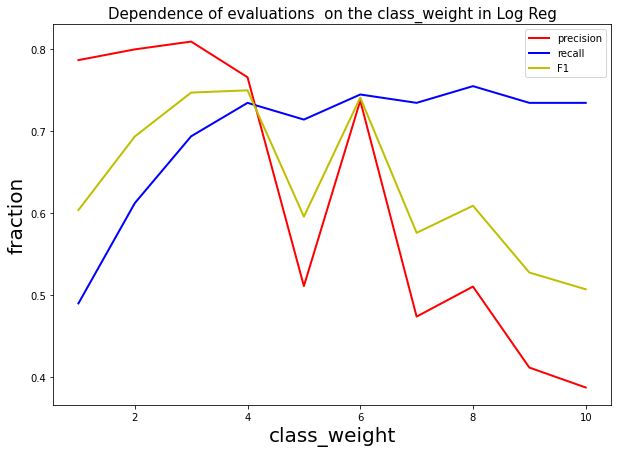

In [158]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), precision_results, linewidth=2, color='r')
plt.plot(range(1, 11), recall_results, linewidth=2, color='b')
plt.plot(range(1, 11), f1_results, linewidth=2, color='y')

plt.legend(['precision', 'recall', 'F1'], fontsize=10)
plt.xlabel('class_weight', fontsize=20)
plt.ylabel('fraction', fontsize=20)
plt.title("Dependence of evaluations  on the class_weight in Log Reg", fontsize=15)
plt.show()


Видно, что при параметре 4 и 6 графики всех метрик пересекаются. 

Посчитаем метрику roc_auc для логистической регресии:

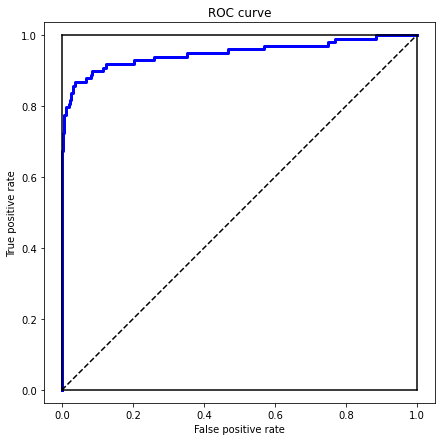

In [ ]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(7, 7))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_log_reg)
plt.plot(fpr, tpr, 'b', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, 0], [0, 1], 'k')
plt.plot([1, 1], [0, 1], 'k')
plt.plot([0, 1], [0, 0], 'k')
plt.plot([0, 1], [1, 1], 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.axis('equal')
plt.title('ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_proba_log_reg)

0.9488539788453367

### (1 балл) Выберите одну метрику, которую вы будете максимизировать

Представьте, что вы решаете задачу автоматического поиска мошеннических транзакций, чтобы ваш робот автоматически банил пользователей, который их осуществляют.

Обоснуйте свой выбор.

Будем максимизировать precision метрику, так как важно случйно не забанить обычных пользавателей, которые не совершают сомнительные операции. 

### (2 балла) Переберите гиперпараметры разных моделей, попытайтесь добиться лучшего результата по этой метрике

Постройте график для каждого перебора, сделайте красивый отчет (не надо просто говорить "я решил выбрать 2, 0.7 и 6, так не пойдет".

Можно преобразовывать датасет, преобразовывать, добавлять, удалять фичи, всё что угодно.

Отсутствие результата тоже результат (вдруг вы перебрали кучу вещей, а лучший все еще самый первый запуск, главное что перебрали).

Построим график зависимости precision от соотношения весов в логистической регрессии.

In [ ]:
import matplotlib.pyplot as plt

In [159]:
precision_results = []
for first_weight in range(1, 11):
  log_reg = LogisticRegression(class_weight={0: 1, 1: first_weight}, max_iter=1000)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred))


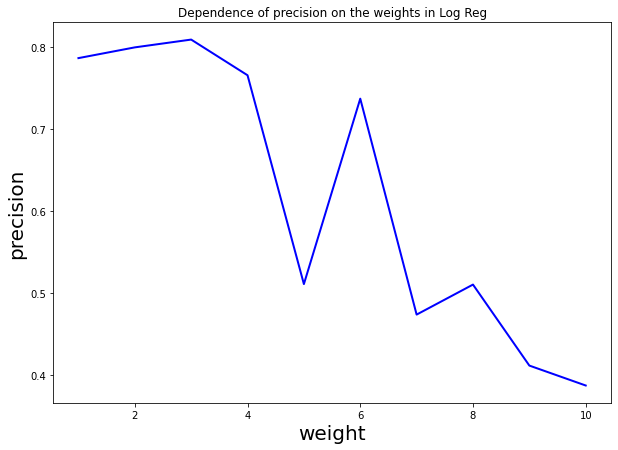

In [160]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), precision_results, linewidth=2, color='b')
plt.title("Dependence of precision on the weights in Log Reg")
plt.xlabel('weight', fontsize=20)
plt.ylabel('precision', fontsize=20)
plt.show()

In [161]:
max(precision_results)

0.8095238095238095

Видно, что при параметре веса 3 точность максимальна и равна 0,81. 




Посчитаем, на параметре class_weight='balanced':

In [ ]:
log_reg_b = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg_b.fit(X_train, y_train)
y_pred = log_reg_b.predict(X_test)
precision_score(y_test, y_pred)

0.04083526682134571

Видно, что гиперпараметр по умолчанию 'uniform' работает гораздо лучше.

Посчитаем, на параметре class_weight='distance' для KNN:

In [ ]:
log_reg_b = KNeighborsClassifier(weights='distance')
log_reg_b.fit(X_train, y_train)
y_pred = log_reg_b.predict(X_test)
precision_score(y_test, y_pred)

1.0

Построим график зависимости precision от количества соседей в KNN.

In [162]:
precision_results = []

for c_neighs in range(1, 5, 1):
  knn = KNeighborsClassifier(n_neighbors=c_neighs)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred))


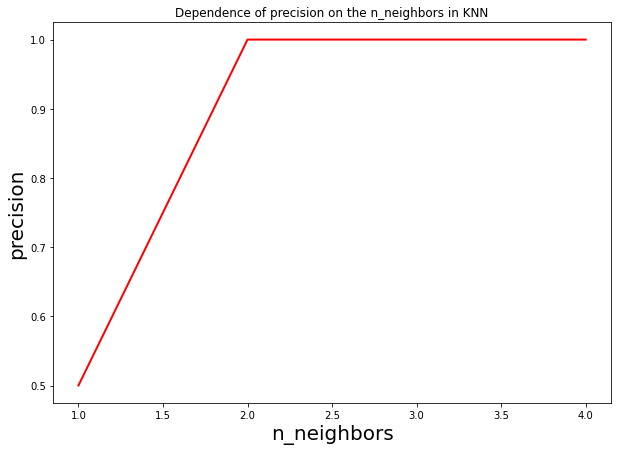

In [164]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 5, 1), precision_results, linewidth=2, color='r')
plt.title( "Dependence of precision on the n_neighbors in KNN")
plt.xlabel('n_neighbors', fontsize=20)
plt.ylabel('precision', fontsize=20)
plt.show()

Видно, что все выявленные мошеники, действительно замышляют недоброе для любого количества n_neighbors.

Построим график зависимости precision от C(0братная сила регуляризации) в логистической регрессии.

In [165]:
import numpy as np

In [166]:
precision_results = []
for c in np.arange(0.1, 3, 0.2):
  log_reg = LogisticRegression(C=c, max_iter=1000)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred))

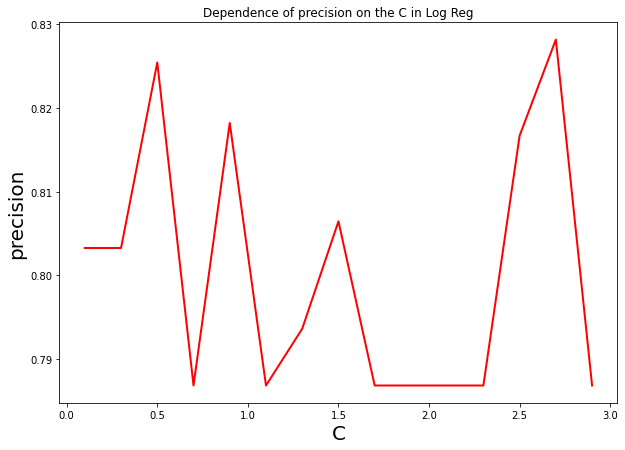

In [174]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(0.1, 3, 0.2), precision_results, linewidth=2, color='r')
plt.title("Dependence of precision on the C in Log Reg")
plt.xlabel('C', fontsize=20)
plt.ylabel('precision', fontsize=20)
plt.show()

In [173]:
max(precision_results)

0.828125

Видно, что при обратной силе регуляризации 2.7 точность наибольшая и равна 0.83 - хороший результат.

**Вывод**

Наилучших результатов удалось достичь на логистической регресии при изменении гипер параметров С и class_weight. Класификатор KNN при всех расмотренных параметрах имеет точность 100 процентов, но как было видно выше имеет слишком маленький recall.

# 2 - Небинарная классификация на вашем датасете (суммарно 6 баллов)

### (2 балла) Выберите какой-нибудь интересный вам датасет, скачайте его и считайте данные

Творческое задание - найти в интернете (или собрать свой даже) датасет, сохранить его в файл, и загрузить сюда.

Требования:

- он должен быть немаленький (хотя бы 500 объектов, лучше больше)
- он должен быть интересный
- таргет должен быть небинарным классом

Минус балл, если ваш датасет с кем-нибудь повторится.

Dataset: Red Wine Quality

Классы упорядочены и не сбалансированы.

Целевой признак: качество вина по десятибальной шкале.

In [168]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/TinkoffML/hw7/winequality-red.csv')

In [169]:
data.shape

(1599, 12)

In [170]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [171]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [172]:
from collections import Counter
Counter(data['quality'])

Counter({3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18})

Больше всего вина среднего качества, слишком хорошего(9, 10) и слишком плохого (1, 2) вообще нет.

Датасет интересен тем, что всегда можно отнести образец вина из дорогого ресторана в лабораторию и с помощью ниже приведённой модели оценить его качество, после этого сопоставить с его ценой, и перестать ходить в этот дорогой ресторан)))

### (2 балла) Обучите несколько моделей, посмотрите на метрики.
Как модели точно возьмите LogisticRegression, KNN и константу, можете придумать еще какие-нибудь.

Как метрики точно возьмите accuracy, разные усреднения precision, recall и f1.

In [ ]:
X = data.drop(columns=['quality'])

In [ ]:
Y = data['quality']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

Константная модель:
Пусть это будут пятёрки, так как вина такого качества больше всего.

In [ ]:
import numpy as np
y_pred_const = np.ones(y_test.size) * 5
y_pred_const

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5.

Логистическая модель:

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 7, 5, 5, 7, 5, 6, 5,
       6, 6, 5, 5, 7, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 6, 6, 5, 7, 6, 6, 6, 5, 7, 5, 6, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       7, 5, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 7, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 6, 5, 5, 5, 5, 7, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 7, 5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 7,
       6, 6, 5, 5, 6, 7, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 6, 7, 5,

In [ ]:
y_pred_proba_log_reg = log_reg.predict_proba(X_test)
y_pred_proba_log_reg[0]

array([0.00391273, 0.03899224, 0.60843699, 0.32680513, 0.02086037,
       0.00099254])

predict_proba возвращает вероятность принадлежности каждому классу.

KNN:

In [ ]:
knn = KNeighborsClassifier(n_neighbors=40)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)
y_pred_proba_knn[0]

array([0.   , 0.075, 0.525, 0.325, 0.075, 0.   ])

Посмотрим accuracy на разных моделях:

In [ ]:
def accuracy(y_real, y_pred) :
  return sum(y_pred == y_real) / y_real.size

In [ ]:
accuracy(y_test, y_pred_const) 

0.40625

In [ ]:
accuracy(y_test, y_pred_log_reg)

0.571875

In [ ]:
accuracy(y_test, y_pred_knn)

0.5125

 Самое большое accuracy при дефолтных гиперпараметрах удалось достичь при LogReg.

Посчитаем Precision, Recall и f1 меру:

Обобщим на несколько классов с помощью:

macro - это аналог One vs The Rest, метрика просто считается для каждого класса независимо, а потом усредняется

micro - это более сложная вещь, здесь нужно рассмотреть каждую пару "объект, класс" как объекты, и как будто считать метрики на бинарной классификации в этой задаче

In [ ]:
print(precision_score(y_test, y_pred_log_reg, average='micro'))
print(precision_score(y_test, y_pred_knn, average='micro'))

0.571875
0.5125


In [ ]:
print(recall_score(y_test, y_pred_log_reg, average='micro'))
print(recall_score(y_test, y_pred_knn, average='micro'))


0.571875
0.5125


In [ ]:
print(f1_score(y_test, y_pred_log_reg, average='micro'))
print(f1_score(y_test, y_pred_knn, average='micro'))

0.571875
0.5125


In [ ]:
print(precision_score(y_test, y_pred_log_reg, average='macro'))
print(precision_score(y_test, y_pred_knn, average='macro'))

0.2530401480895997
0.2144308943089431


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(recall_score(y_test, y_pred_log_reg, average='macro'))
print(recall_score(y_test, y_pred_knn, average='macro'))

0.2491980241980242
0.2141913641913642


In [ ]:
print(f1_score(y_test, y_pred_log_reg, average='macro'))
print(f1_score(y_test, y_pred_knn, average='macro'))

0.2424436639196291
0.20120181405895696


У LogReg большая точность чем у KNN на всех метриках, при дефолтных параметрах.

### (2 балла) Выберите метрику, которую вы хотите максимизировать. Переберите гиперпараметры, постарайтесь найти модель, которая максимизирует эту метрику.

Обоснуйте свой выбор. Напишите красивый отчет с графиками. Добились ли вы результатов, которых хотели добиться для этого датасета?

Будем максимизировать precision micro метрику, так как для нас важна точность определения качества именно нашей бутылки вина, а другие слишком дешёвые для нас.

Переберём гиперпараметры для максимизации нашей метрики и выберем оптимальную модель:

Построим график зависимости precision micro от соотношения весов в логистической регрессии.

In [ ]:
precision_78_results = []
precision_34_results = []
for weight in range(1, 11):
    log_reg_78 = LogisticRegression(class_weight={3: 1, 
                                             4: 1,
                                             5: 1,
                                             6: 1,
                                             7: weight,
                                             8: weight}, max_iter=10000)
    log_reg_34 = LogisticRegression(class_weight={3: weight, 
                                             4: weight,
                                             5: 1,
                                             6: 1,
                                             7: 1,
                                             8: 1}, max_iter=10000)
    log_reg_34.fit(X_train, y_train)
    log_reg_78.fit(X_train, y_train)

    y_pred_34 = log_reg_34.predict(X_test)
    y_pred_78 = log_reg_78.predict(X_test)

    precision_34_results.append(precision_score(y_test, y_pred_34, average='micro'))
    precision_78_results.append(precision_score(y_test, y_pred_78, average='micro'))


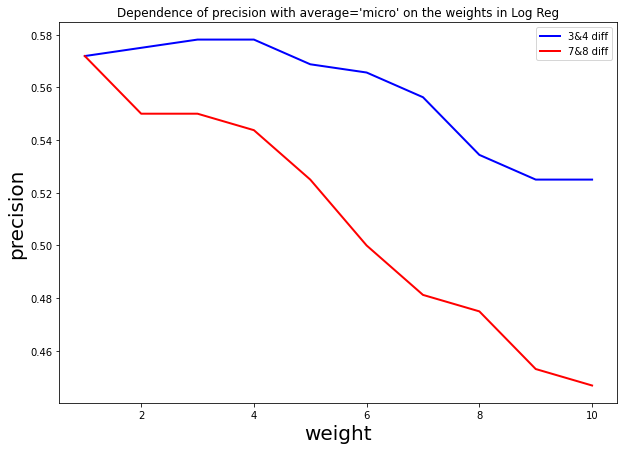

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), precision_34_results, linewidth=2, color='b', label="3&4 diff")
plt.plot(range(1, 11), precision_78_results, linewidth=2, color='r', label="7&8 diff")
plt.title( "Dependence of precision with average='micro' on the weights in Log Reg")
plt.xlabel('weight', fontsize=20)
plt.ylabel('precision', fontsize=20)
plt.legend(fontsize=10)
plt.show()

In [ ]:
print(max(precision_34_results))
print(max(precision_78_results))

При оценки веса третьего и четвёртого таргета оптимальный вес при котором оценка максимальна(0.578125) равен *4*

Посчитаем, на параметре class_weight='balanced':

In [ ]:
log_reg_b = LogisticRegression(class_weight='balanced', max_iter=10000)
log_reg_b.fit(X_train, y_train)
y_pred = log_reg_b.predict(X_test)
precision_score(y_test, y_pred, average='micro')

0.396875

Ничего хорошего(

Посчитаем, на параметре class_weight='distance' для KNN:

In [ ]:
log_reg_b = KNeighborsClassifier(weights='distance')
log_reg_b.fit(X_train, y_train)
y_pred = log_reg_b.predict(X_test)
precision_score(y_test, y_pred, average='micro')

0.5375

 Лучше, чем для обычного KNN)

Построим график зависимости precision micro от количества соседей в KNN.

In [ ]:
precision_results = []

for c_neighs in range(1, 100, 5):
  knn = KNeighborsClassifier(n_neighbors=c_neighs)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred, average='micro'))

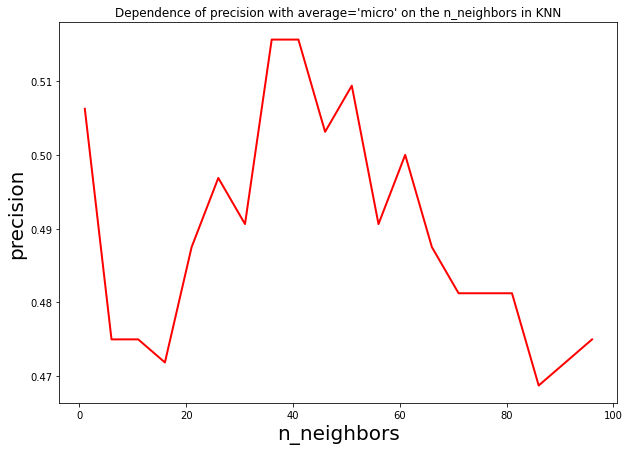

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(range(1, 100, 5), precision_results, linewidth=2, color='r')
plt.title( "Dependence of precision with average='micro' on the n_neighbors in KNN")
plt.xlabel('n_neighbors', fontsize=20)
plt.ylabel('precision', fontsize=20)
plt.show()

In [ ]:
print(max(precision_results))

0.515625


Оптимальное значение n_neighbors для KNN, при котором точность максимальна(0.515625), равно 40. Но это всё равно не дотягивает до LogReg:)

Построим график зависимости precision от C(0братная сила регуляризации) в логистической регрессии.

In [ ]:
precision_results = []
for c in np.arange(0.1, 5, 0.4):
  log_reg = LogisticRegression(C=c, max_iter=10000)
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)

  precision_results.append(precision_score(y_test, y_pred, average='micro'))

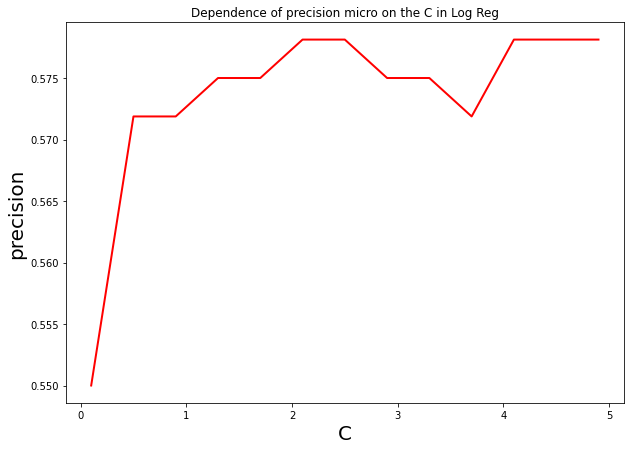

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(np.arange(0.1, 5, 0.4), precision_results, linewidth=2, color='r')
plt.title("Dependence of precision micro on the C in Log Reg")
plt.xlabel('C', fontsize=20)
plt.ylabel('precision', fontsize=20)
plt.show()

In [ ]:
max(precision_results)

0.578125

Видно, что при обратной силе регуляризации 2 точность наибольшая и равна 0.578125 - хороший результат.

**Вывод**

Наилучших результатов для оценки precision micro удалось достичь на логистической регресии при изменении гиперпараметров С и class_weight. Класификатор KNN при оптимальных расмотренных параметрах уступает LogReg приблизительно на 5  процентов. LogReg при оптимальных параметрах обходит констатную модель на приблизительно на 20 процентов. 